In [1]:
import pandas as pd
bse_data=pd.read_csv('/content/Hindustan Unilever Ltd.csv')
print(bse_data)

           Date      Open      High       Low     Close    Volume
0    02/16/2024  2,367.80  2,382.00  2,358.50  2,375.05  2,25,564
1    02/15/2024  2,368.00  2,382.55  2,347.00  2,351.10  1,02,032
2    02/14/2024  2,382.45  2,394.45  2,370.15  2,388.95    35,100
3    02/13/2024  2,393.90  2,400.30  2,380.35  2,393.55    45,970
4    02-12-2024  2,421.15  2,424.00  2,382.80  2,385.60    65,369
..          ...       ...       ...       ...       ...       ...
738  02/22/2021  2,200.00  2,201.70  2,161.10  2,167.25    98,782
739  02/19/2021  2,150.00  2,193.65  2,148.00  2,181.15  1,50,398
740  02/18/2021  2,165.00  2,168.45  2,143.05  2,147.75  1,10,272
741  02/17/2021  2,191.00  2,200.00  2,160.30  2,164.65  1,38,504
742  02/16/2021  2,225.00  2,228.40  2,190.50  2,196.90  1,01,652

[743 rows x 6 columns]


In [2]:
bse_data['Open'] = bse_data['Open'].str.replace(',', '').astype(float)
bse_data['Close'] = bse_data['Close'].str.replace(',', '').astype(float)

In [3]:
bse_data['High'] = bse_data['High'].str.replace(',', '').astype(float)

In [4]:
bse_data['Low'] = bse_data['Low'].str.replace(',', '').astype(float)

In [5]:
bse_data['Volume'] = bse_data['Volume'].str.replace(',', '').astype(int)

In [ ]:
print(bse_data['Open'].mean())
print(bse_data['Close'].mean())
print(bse_data['High'].mean())
print(bse_data['Low'].mean())
print(bse_data['Volume'].mean())

492.6225548902196
491.68782435129737
502.68672654690624
482.9054890219561
556544.1157684631


In [11]:
bse_data['Return']=bse_data['Close']-bse_data['Open']
print(bse_data)
print(bse_data['Return'].mean())

          Date     Open     High      Low    Close  Volume  Target  Return
0   2024-02-16  2367.80  2382.00  2358.50  2375.05  225564       0    7.25
1   2024-02-15  2368.00  2382.55  2347.00  2351.10  102032       0  -16.90
2   2024-02-14  2382.45  2394.45  2370.15  2388.95   35100       0    6.50
3   2024-02-13  2393.90  2400.30  2380.35  2393.55   45970       0   -0.35
4   2024-02-12  2421.15  2424.00  2382.80  2385.60   65369       0  -35.55
..         ...      ...      ...      ...      ...     ...     ...     ...
738 2021-02-22  2200.00  2201.70  2161.10  2167.25   98782       0  -32.75
739 2021-02-19  2150.00  2193.65  2148.00  2181.15  150398       0   31.15
740 2021-02-18  2165.00  2168.45  2143.05  2147.75  110272       0  -17.25
741 2021-02-17  2191.00  2200.00  2160.30  2164.65  138504       0  -26.35
742 2021-02-16  2225.00  2228.40  2190.50  2196.90  101652       0  -28.10

[743 rows x 8 columns]
-0.50336473755048


In [ ]:
a=min(bse_data['Low'])
b=max(bse_data['High'])
print("The prices of the stock went from",a,"to",b)

The prices of the stock went from 221.0 to 878.35


In [ ]:
bse_data.describe()

,Date,Open,High,Low,Close,Volume,Year,Month
count,501,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000,501.000000
mean,2023-02-11 07:16:53.173652480,492.622555,502.686727,482.905489,491.687824,5.565441e+05,2022.620758,6.451098
min,2022-02-08 00:00:00,221.000000,265.200000,221.000000,265.200000,3.785100e+04,2022.000000,1.000000
25%,2022-08-10 00:00:00,370.050000,377.850000,365.450000,369.800000,1.376270e+05,2022.000000,3.000000
50%,2023-02-09 00:00:00,420.000000,425.200000,413.650000,418.800000,2.446600e+05,2023.000000,6.000000
75%,2023-08-14 00:00:00,633.000000,643.100000,620.600000,633.200000,5.328010e+05,2023.000000,9.000000
max,2024-02-16 00:00:00,860.000000,878.350000,798.500000,840.500000,7.510055e+06,2024.000000,12.000000
std,NaN,143.796875,147.186993,139.427730,143.154815,8.860159e+05,0.606538,3.468156


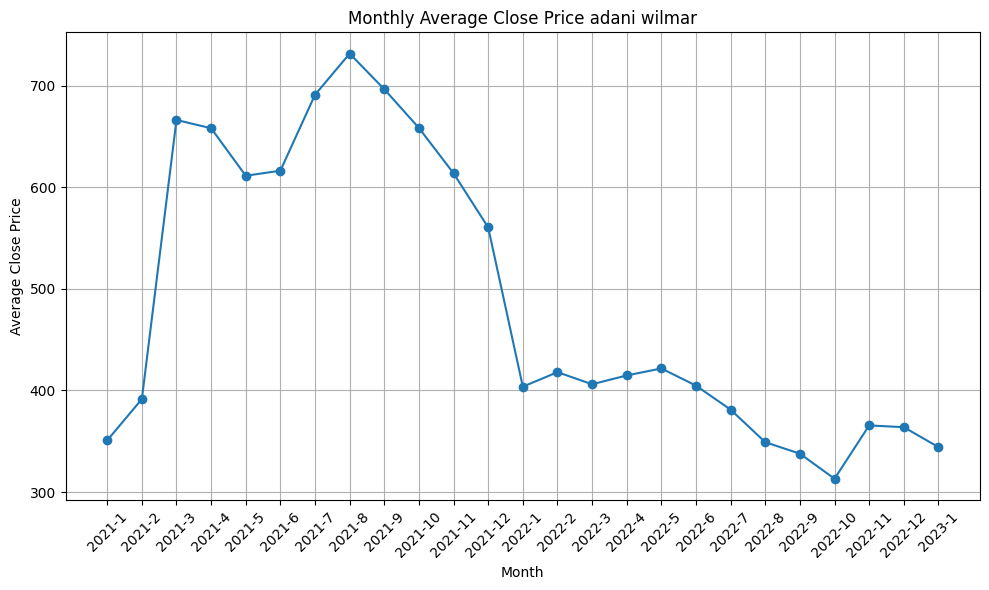

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
data=bse_data
# Extract the year and month from the 'date' column
bse_data['Date'] = pd.to_datetime(bse_data['Date'],format='mixed')
bse_data['Year']=bse_data['Date'].dt.year
bse_data['Month']=bse_data['Date'].dt.month
monthly_average_close = bse_data.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_average_close.index, monthly_average_close['Close'], marker='o', linestyle='-')

plt.title('Monthly Average Close Price adani wilmar')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)

# Function to generate x-axis labels with alternating years
def generate_labels(x):
    year = 2021 + (x // 12)
    month = x % 12 + 1
    return f'{year}-{month}'

# Set x-axis labels
plt.xticks(ticks=range(len(monthly_average_close)), labels=[generate_labels(x) for x in range(len(monthly_average_close))], rotation=45)

plt.tight_layout()
plt.show()

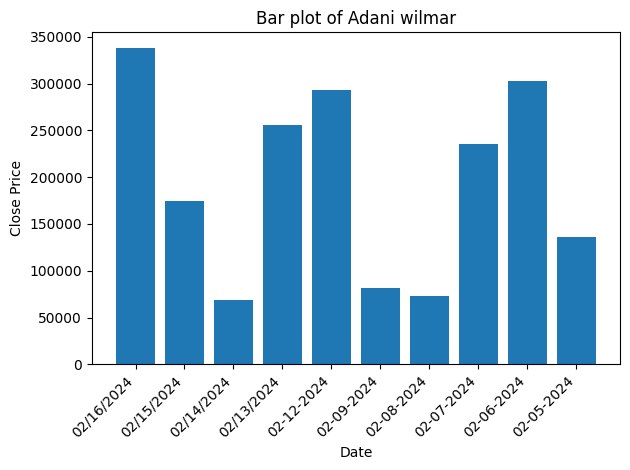

In [ ]:
import matplotlib.pyplot as plt
bse_data1=bse_data[0:10]
x_data = bse_data1['Volume']
y_data = bse_data1['Date']
# Plotting the data
plt.bar(y_data,x_data)

# Customize the plot (add labels, title, etc. as needed)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bar plot of Adani wilmar')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



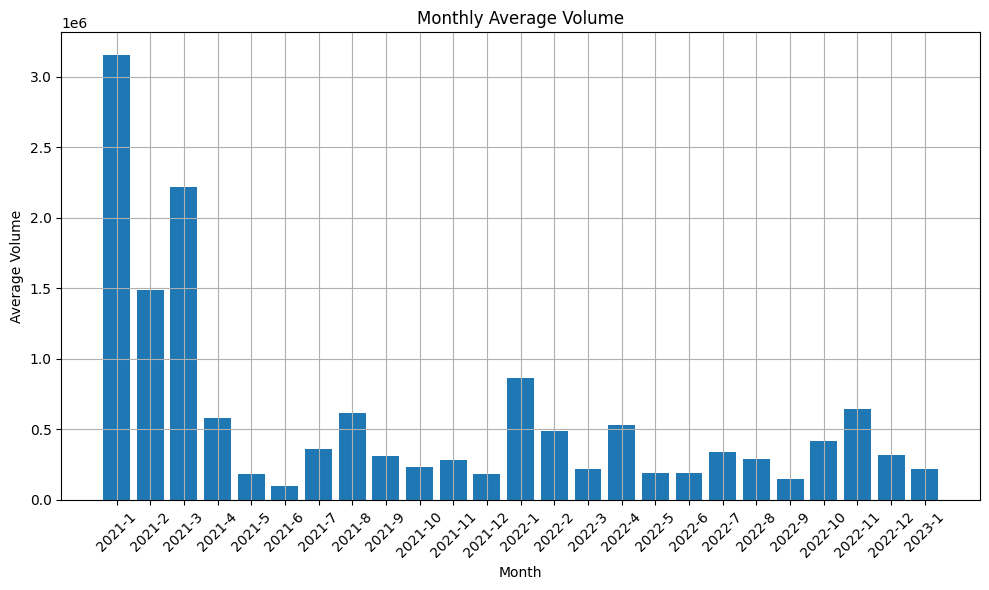

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
data=bse_data
# Extract the year and month from the 'date' column
bse_data['Date'] = pd.to_datetime(bse_data['Date'],format='mixed')
bse_data['Year']=bse_data['Date'].dt.year
bse_data['Month']=bse_data['Date'].dt.month
monthly_average_close = bse_data.groupby(['Year', 'Month'])['Volume'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_average_close.index, monthly_average_close['Volume'])

plt.title('Monthly Average Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.grid(True)

# Function to generate x-axis labels with alternating years
def generate_labels(x):
    year = 2021 + (x // 12)
    month = x % 12 + 1
    return f'{year}-{month}'

# Set x-axis labels
plt.xticks(ticks=range(len(monthly_average_close)), labels=[generate_labels(x) for x in range(len(monthly_average_close))], rotation=45)

plt.tight_layout()
plt.show()

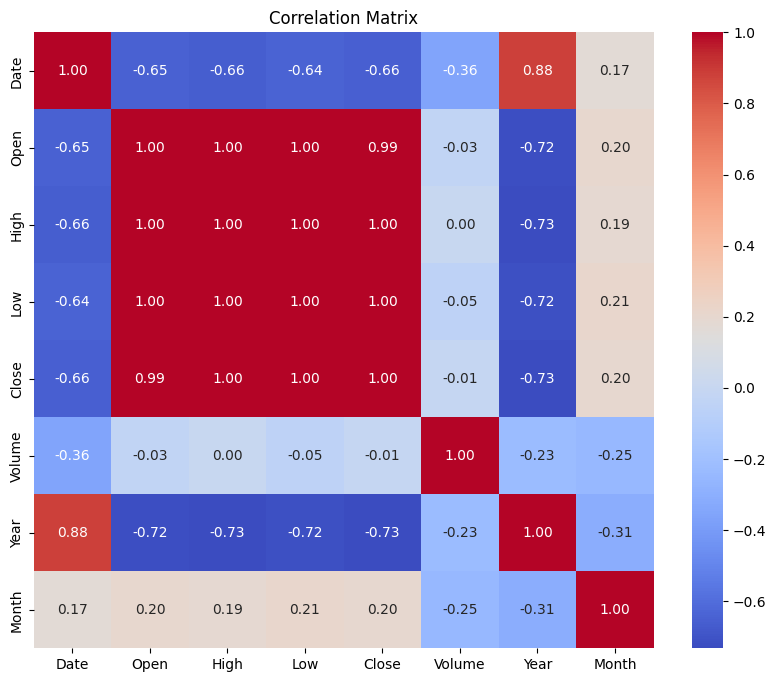

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = 6
corr_matrix = bse_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# Show the plot
plt.show()

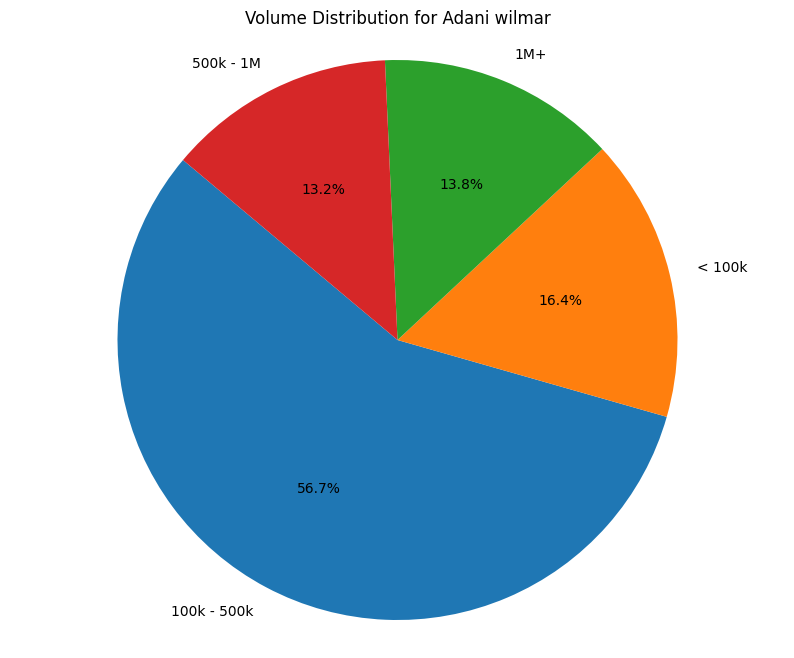

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


bins = [0, 100000, 500000, 1000000, np.inf]
bin_labels = ['< 100k', '100k - 500k', '500k - 1M', '1M+']

bse_data['volume_bins'] = pd.cut(bse_data['Volume'], bins=bins, labels=bin_labels)

volume_counts = bse_data['volume_bins'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(volume_counts, labels=volume_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Volume Distribution for Adani wilmar')
plt.axis('equal')

plt.show()

Outlier Points:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Year, Month, volume_bins]
Index: []


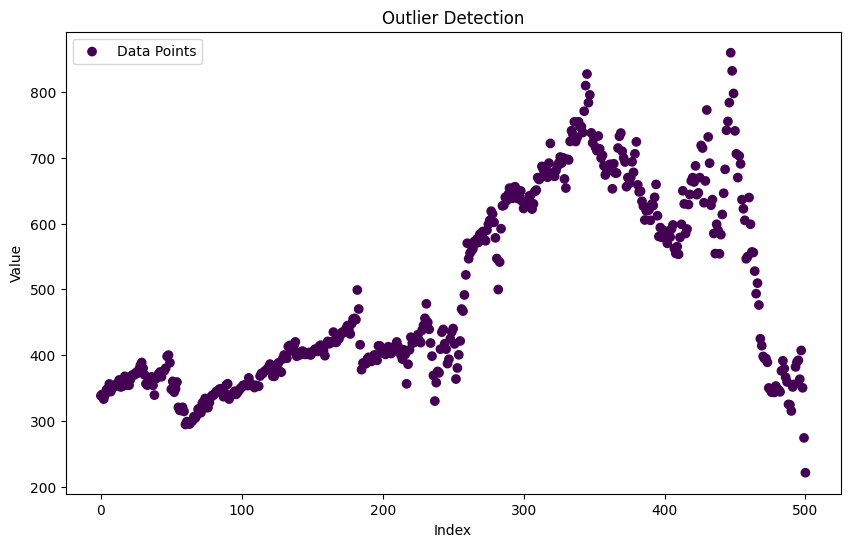

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


df = bse_data

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detect outliers in the 'Value' column
outliers = detect_outliers_iqr(df['Open'])
print("Outlier Points:")
print(df[outliers])
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Open'], c=outliers, cmap='viridis', label='Data Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Outlier Detection')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-75-6a2f9f41baac>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


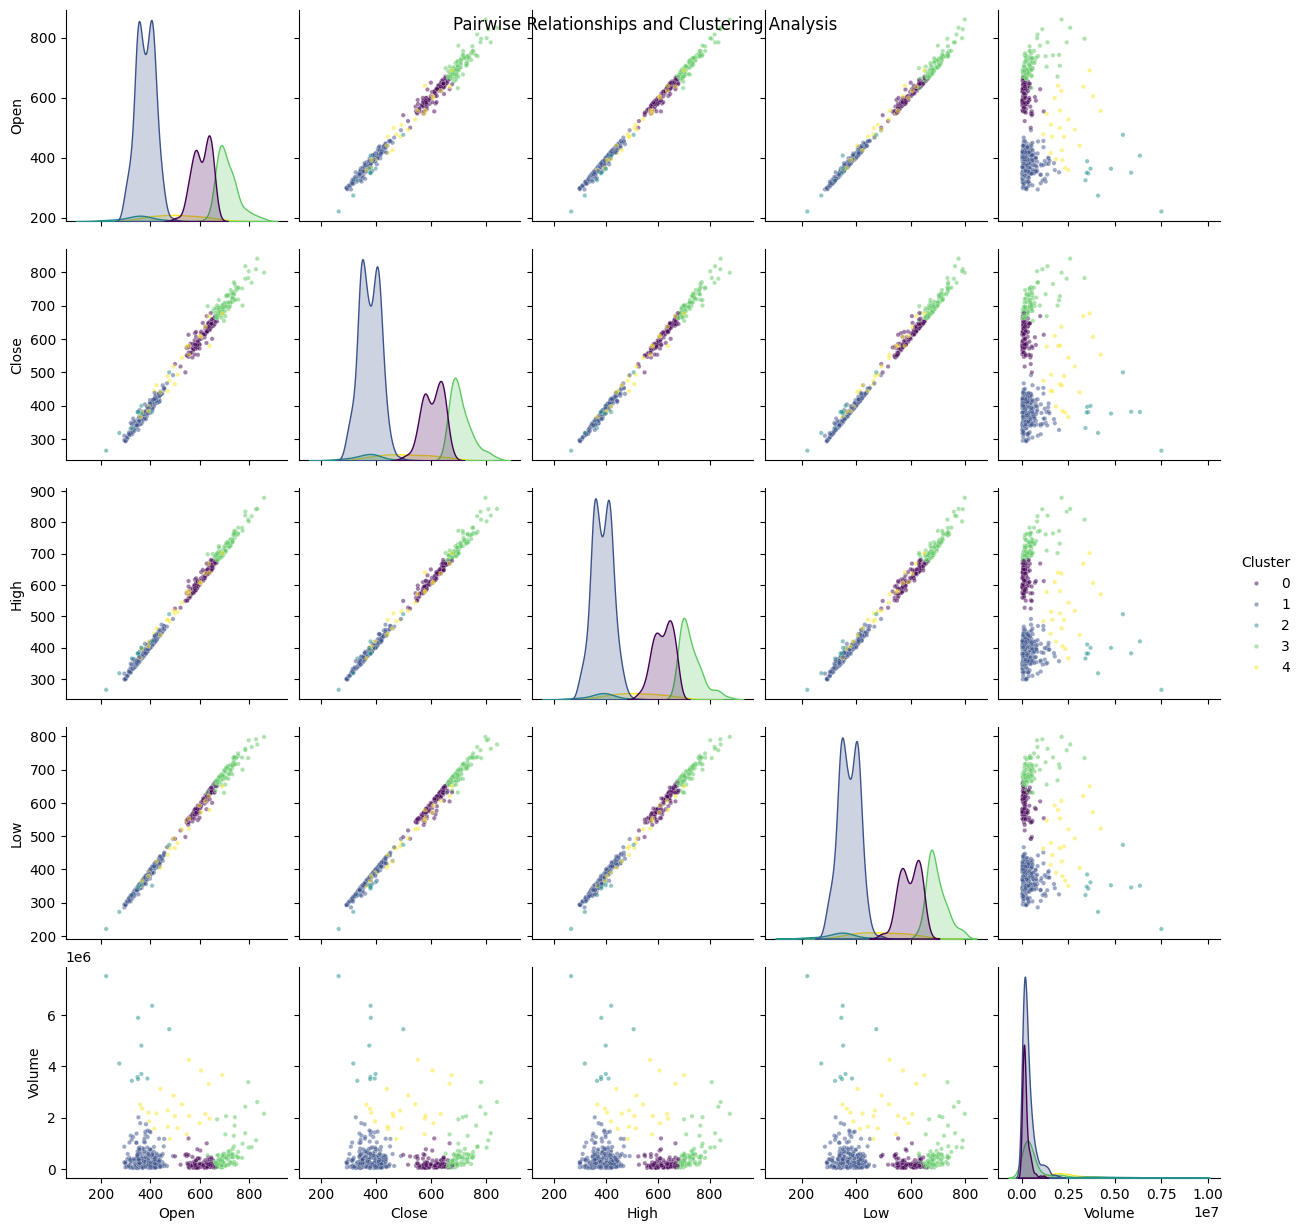

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
num_samples = 1000000
data = bse_data[['Open', 'Close', 'High','Low','Volume']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
data['Cluster'] = labels

# Visualize the clusters using a scatter matrix plot
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.suptitle('Pairwise Relationships and Clustering Analysis')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset with millions of data points
num_samples = 1000000
data = bse_data[['Open', 'Close', 'High','Low','Volume']]

# Remove some random values to simulate missing data
missing_percentage = 0.01  # 1% of values will be removed
mask = np.random.rand(*data.shape) < missing_percentage
data[mask] = np.nan

# Find missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Impute missing values using mean imputation
data_imputed = data.fillna(data.mean())

# Verify if missing values are imputed
missing_values_after_imputation = data_imputed.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

Missing values in the dataset:
Open       7
Close     17
High      16
Low       14
Volume    13
dtype: int64

Missing values after imputation:
Open      0
Close     0
High      0
Low       0
Volume    0
dtype: int64


<ipython-input-29-2988861737f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mask] = np.nan
<ipython-input-29-2988861737f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mask] = np.nan


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset from a CSV file named 'bse_data.csv'
data = bse_data
# Assuming your features are in columns other than the target column

X = data[['Open', 'Close', 'High', 'Low', 'Volume']]  # Features
y = data['Open']  # Target variable, replace 'movement_direction' with your actual target column name
# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=3)  # Select top 3 features based on ANOVA F-value
X_selected = selector.fit_transform(X, y)

# Get indices of selected features
selected_feature_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_feature_indices)

# Get names of selected features
selected_feature_names = X.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)

Selected feature indices: [0 2 3]
Selected feature names: Index(['Open', 'High', 'Low'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


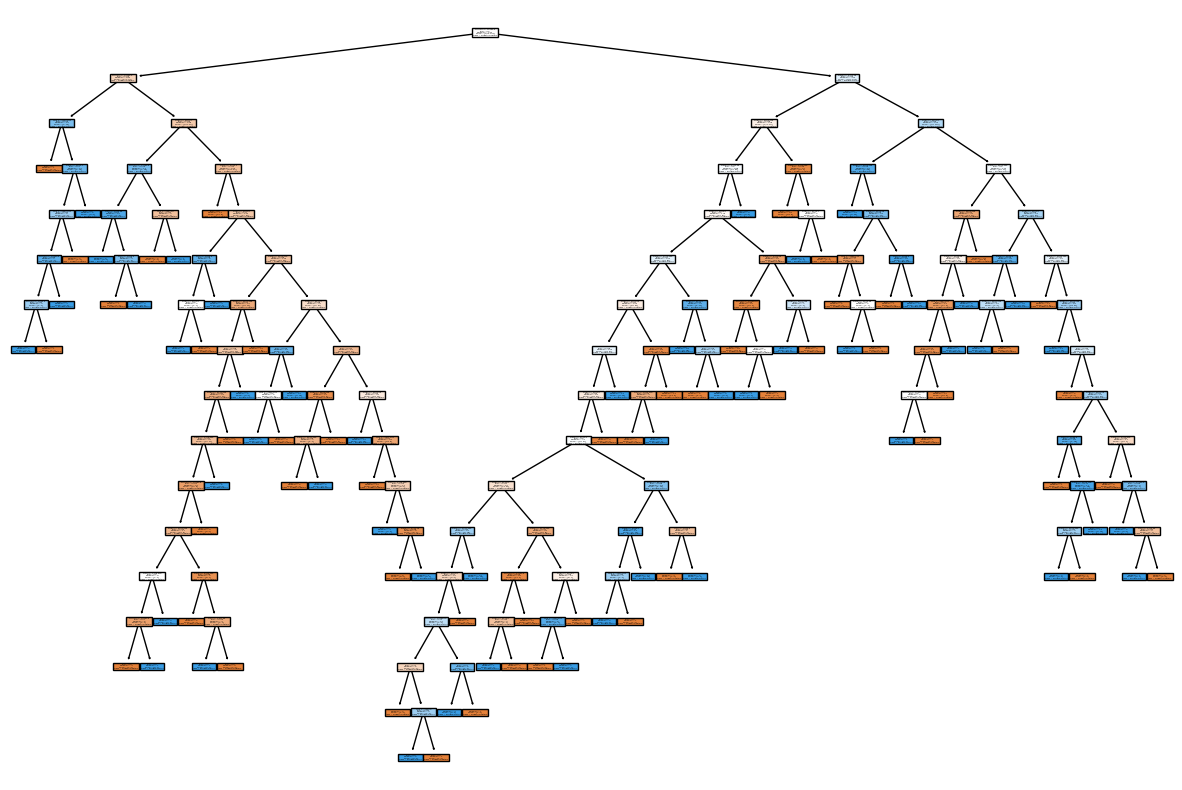

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
stock_data = bse_data

# Convert date to datetime object
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Create target variable (0 for negative returns, 1 for positive returns)
stock_data['Target'] = (stock_data['Return'] > 0).astype(int)

# Features and target variable
X = stock_data[['Open', 'Close', 'High', 'Low', 'Volume']]
y = stock_data['Target']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Negative Return', 'Positive Return'], filled=True)
plt.show()

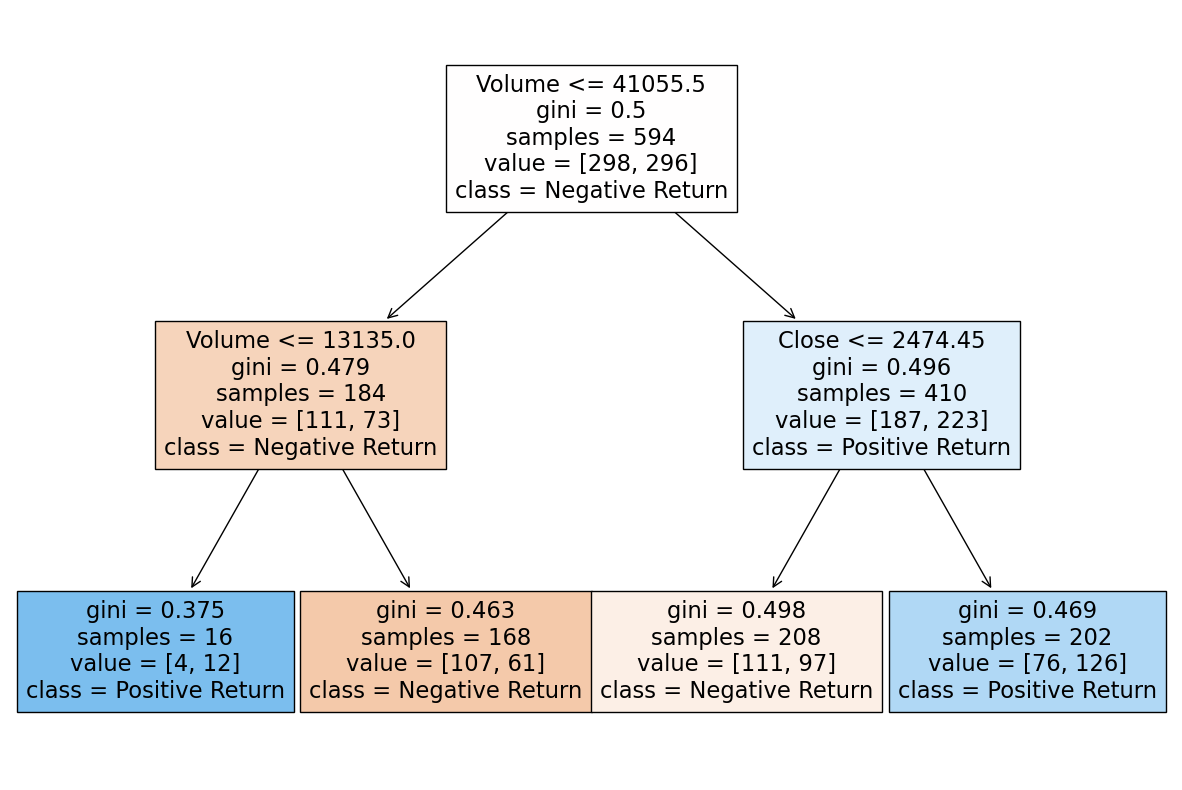

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
stock_data = bse_data

# Convert date to datetime object
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Create target variable (0 for negative returns, 1 for positive returns)
stock_data['Target'] = (stock_data['Return'] > 0).astype(int)

# Features and target variable
X = stock_data[['Open', 'Close', 'High', 'Low', 'Volume']]
y = stock_data['Target']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Negative Return', 'Positive Return'], filled=True)
plt.show()

Mean Squared Error: 48.63469211650074
R-squared: 0.9978038202991565


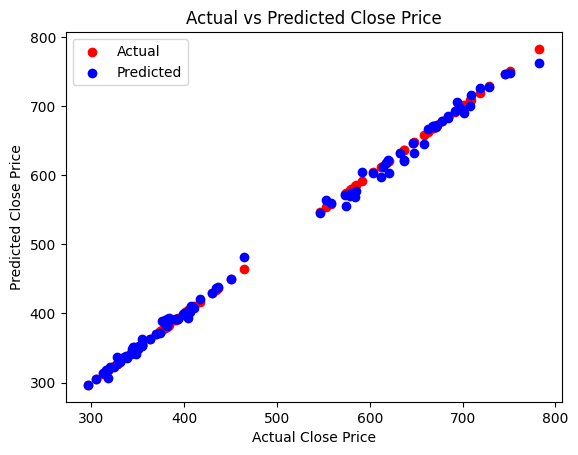

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'bse_data.csv' is your dataset file, replace it with your actual filename or path
data = bse_data

# Drop any NaN values
data.dropna(inplace=True)

# Feature selection
# Assuming 'Open', 'High', 'Low', and 'Volume' as features
X = data[['Open', 'High', 'Low', 'Volume']]
# Target variable
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted
plt.scatter(y_test, y_test, color='red', label='Actual')  # Plot actual values in red
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Plot predicted values in blue
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for five companies (assuming data is stored in separate CSV files)
# Replace 'company1.csv', 'company2.csv', etc. with actual filenames or paths
company1_data = pd.read_csv('/content/Adani wilmar dataset.csv')
company2_data = pd.read_csv('/content/Hindustan Unilever Ltd.csv')
company3_data = pd.read_csv('/content/ITC.csv')
company4_data = pd.read_csv('/content/Nestle India Ltd.csv')
company5_data = pd.read_csv('/content/Tata consumer product.csv')

# Convert all dataset values to strings for the five companies
for data in [company1_data, company2_data, company3_data, company4_data, company5_data]:
    data['Date'] = pd.to_datetime(data['Date'],format='mixed')
    data['Close'] = data['Close'].astype(str)
for data in [company1_data, company2_data, company3_data, company4_data, company5_data]:
    data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Concatenate all dataframes
all_data = pd.concat([company1_data, company2_data, company3_data, company4_data, company5_data])

# Group by month and calculate mean for each dataset
monthly_means = all_data.groupby(all_data['Date'].dt.to_period('M')).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean 'close' price for each company
for company in ['company1', 'company2', 'company3', 'company4', 'company5']:
    plt.plot(monthly_means.index.to_timestamp(), monthly_means[f'{company}_Close'], label=company)

plt.title('Mean Close Price for Five Companies (Monthly)')
plt.xlabel('Date')
plt.ylabel('Mean Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Adani wilmar dataset.csv'

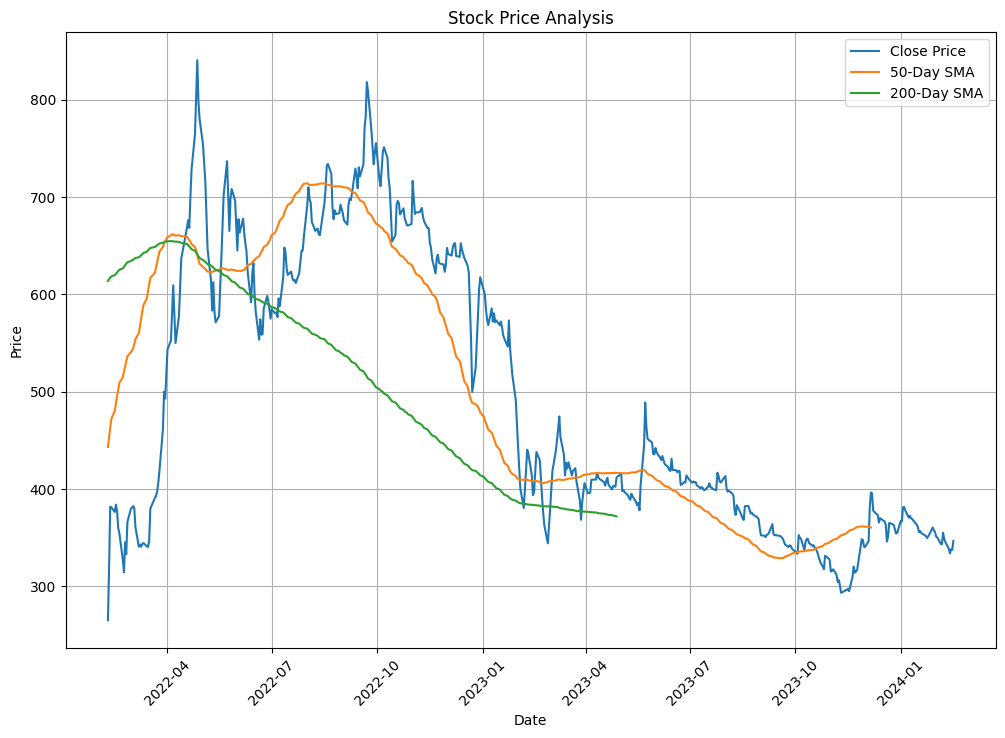

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stock data
stock_data = bse_data

# Calculate additional features
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
stock_data['EMA_12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()  # 12-day Exponential Moving Average
stock_data['EMA_26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()  # 26-day Exponential Moving Average
stock_data['MACD'] = stock_data['EMA_12'] - stock_data['EMA_26']  # Moving Average Convergence Divergence
stock_data['RSI'] = 100 - (100 / (1 + (stock_data['Close'].diff(1).fillna(0) / stock_data['Close'].shift(1).fillna(0)).rolling(window=14).apply(lambda x: x.mean(), raw=True)))  # Relative Strength Index

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['SMA_50'], label='50-Day SMA')
plt.plot(stock_data['Date'], stock_data['SMA_200'], label='200-Day SMA')

plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Tilt the x-axis labels by 45 degrees
plt.grid(True)
plt.show()